# Inhaltsverzeichnis

1. [Einführung](#1-Einführung) <br>
2. [Datensatzbeschreibung](#2-Datensatzbeschreibung) <br>
3. [K-Nearest Neighbors (KNN)](#3-K-Nearest-Neighbors-(KNN)) <br>
    3.1 [Mathematische Grundlagen von KNN](#3-1-Mathematische-Grundlagen-von-KNN) <br>
    3.1.1 [Manhattan-Distanz (auch L1-Distanz)](#3-1-1-Manhattan-Distanz-(auch-L1-Distanz)) <br>
    3.1.2 [Minkowski-Distanz](#3-1-2-Minkowski-Distanz) <br>
    3.2 [KNN-Implementierung](#3-2-KNN-Implementierung) <br>
4. [K-Medoids](#4-K-Medoids) <br>
    4.1 [Mathematische Grundlagen von K-Medoids](#4-1-Mathematische-Grundlagen-von-K-Medoids) <br>
    4.2 [K-Medoids-Implementierung](#4-2-K-Medoids-Implementierung) <br>
5. [Gaussian Mixture Models (GMM)](#5-Gaussian-Mixture-Models-(GMM)) <br>
    5.1 [Mathematische Grundlagen von GMM](#5-Gaussian-Mixture-Models-(GMM)) <br>
    5.2 [GMM-Implementierung](#5-2-GMM-Implementierung) <br>
6. [Visualisierung und Interpretation der Ergebnisse](#6-Visualisierung-und-Interpretation-der-Ergebnisse) <br>
7. [Fazit](#7-Fazit) <br>

<a id="1-Einführung"></a>
# 1. Einführung

In diesem Projekt wollen wir uns mit drei unterschiedlichen Clustering-Algorithmen befassen: K-Nearest Neighbors (KNN), K-Medoids und Gaussian Mixture Models (GMM). Diese Methoden gehören zu den populärsten Techniken im Bereich des Unsupervised Learnings, also des unüberwachten Lernens. Ziel ist es, eine Gruppe von ähnlichen Datenpunkten zu identifizieren und diese in Cluster zu unterteilen.

<a id="2-Datensatzbeschreibung"></a>
# 2. Datensatzbeschreibung

Für dieses Projekt verwenden wir den Iris-Datensatz, der drei verschiedene Arten von Iris-Blumen basierend auf vier Attributen (Sepal length, Sepal width, Petal length, Petal width) klassifiziert. Da die Labels in unserem Fall nicht benötigt werden, entfernen wir diese und konzentrieren uns auf die Clusterbildung der Daten.

In [1]:
# Gegen Memory-Leaks die beim Arbeiten mit KMeans unter Windows auftreten können
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
# Datensatz laden
iris = load_iris()
X = iris.data

# Daten skalieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<a id="3-K-Nearest-Neighbors-(KNN)"></a>
# 3. K-Nearest Neighbors (KNN)
<a id="3-1-Mathematische-Grundlagen-von-KNN"></a>
## 3.1 Mathematische Grundlagen von KNN


KNN ist ein einfacher, aber effektiver Algorithmus zur Klassifizierung, der auch für Clustering verwendet werden kann. Der Algorithmus berechnet die Distanz zwischen den Punkten und wählt die k nächstgelegenen Nachbarn aus. Der verwendete Abstand ist in der Regel der euklidische Abstand, der wie folgt definiert ist:

$$
d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

Dabei sind $x_i$ und $y_i$ die Koordinaten der Datenpunkte im n-dimensionalen Raum.

*Folgend wir noch auf zwei weitere Möglichkeiten eingegangen den Abstand zwischen den Punkten zu berechnen.*

<a id="3-1-1-Manhattan-Distanz-(auch-L1-Distanz)"></a>
### 3.1.1. Manhattan-Distanz (auch L1-Distanz)

Die Manhattan-Distanz, auch als City-Block-Distanz bekannt, misst den Abstand zwischen zwei Punkten, indem sie die absoluten Differenzen ihrer Koordinaten summiert:

markdown

$$
d(x, y) = \sum_{i=1}^n |x_i - y_i|
$$

Dabei sind $x_i$ und $y_i$ die Koordinaten der Punkte im n-dimensionalen Raum.

<a id="3-1-2-Minkowski-Distanz"></a>
### 3.1.2. Minkowski-Distanz

Die Minkowski-Distanz verallgemeinert sowohl die euklidische als auch die Manhattan-Distanz. Sie wird durch einen Parameter pp gesteuert, der bestimmt, ob die Berechnung eher der euklidischen oder der Manhattan-Distanz ähnelt:

markdown

$$
d(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

    Für p=1p=1 entspricht die Minkowski-Distanz der Manhattan-Distanz.
    Für p=2p=2 entspricht sie der euklidischen Distanz.

<a id="3-2-KNN-Implementierung"></a>
## 3.2 KNN-Implementierung

Wir werden KNN mit einem vorgegebenen Wert für k anwenden und die Vorhersagen auf Basis der k-Nachbarn treffen.

In [3]:
# KNN-Modell auf den Datensatz anwenden
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, iris.target)

# Vorhersage für die ersten 10 Datenpunkte
print("KNN Vorhersagen:", knn.predict(X_scaled[:10]))

KNN Vorhersagen: [0 0 0 0 0 0 0 0 0 0]


<a id="4-K-Medoids"></a>
# 4. K-Medoids
<a id="4-1-Mathematische-Grundlagen-von-K-Medoids"></a>
## 4.1 Mathematische Grundlagen von K-Medoids
Im Gegensatz zu K-Means, das den Mittelwert zur Bestimmung des Zentrums verwendet, verwendet K-Medoids tatsächlich existierende Punkte aus den Daten als Medoids (Zentroiden). Ziel ist es, die Summe der Distanzen aller Punkte zu ihrem nächstgelegenen Medoid zu minimieren:

$$
J = \sum_{i=1}^n \min_{k=1,\dots,K} d(x_i, m_k)
$$

Hierbei ist $d(x_i,m_k)$ die Distanz eines Punktes xixi​ zu seinem Medoid $m_k$.

<a id="4-2-K-Medoids-Implementierung"></a>
## 4.2 K-Medoids-Implementierung

In [4]:
# K-Medoids Modell erstellen und fitten
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X_scaled)

# Cluster Labels ausgeben
print("K-Medoids Cluster Labels:", kmedoids.labels_)

K-Medoids Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


<a id="5-Gaussian-Mixture-Models-(GMM)"></a>
# 5. Gaussian Mixture Models (GMM)
<a id="5-Gaussian-Mixture-Models-(GMM)"></a>
## 5.1 Mathematische Grundlagen von GMM

GMM basiert auf der Annahme, dass die Daten durch eine Mischung von mehreren multivariaten Normalverteilungen (Gauss'schen Verteilungen) modelliert werden können. Jede Verteilung hat eine eigene Kovarianzmatrix, und die Gesamtverteilung wird durch die Summe der einzelnen Verteilungen beschrieben. Die Wahrscheinlichkeit für einen Punkt xx unter einem GMM ist:

markdown

$$
p(x) = \sum_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
$$

wobei $N(x∣μ_k,Σ_k)$ eine multivariate Normalverteilung mit Mittelwert $μ_k$ und Kovarianzmatrix $Σ_k$ ist und πkπk​ die Gewichtung des k-ten Clusters.

<a id="5-2-GMM-Implementierung"></a>
## 5.2 GMM-Implementierung

In [5]:
# GMM-Modell erstellen und fitten
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Cluster Labels ausgeben
print("GMM Cluster Labels:", gmm.predict(X_scaled))

GMM Cluster Labels: [1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


<a id="6-Visualisierung-und-Interpretation-der-Ergebnisse"></a>
# 6. Visualisierung und Interpretation der Ergebnisse

Nun visualisieren wir die Clustereinteilungen für alle drei Algorithmen und vergleichen die Ergebnisse.

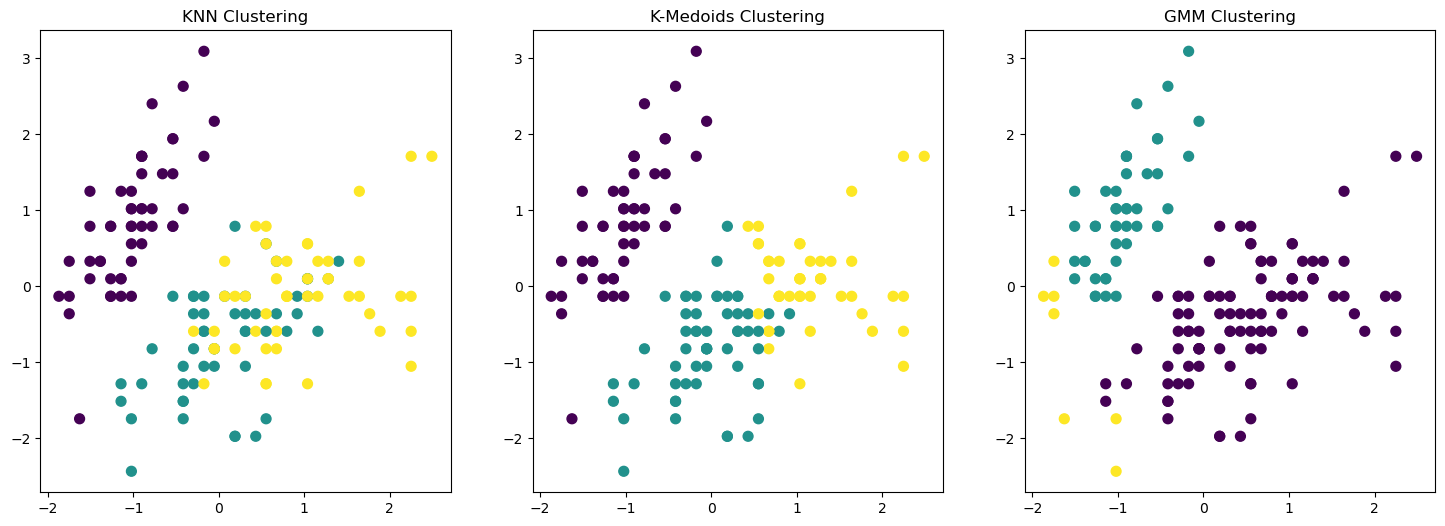

In [6]:
# Cluster Labels von GMM und K-Medoids holen
labels_knn = knn.predict(X_scaled)
labels_kmedoids = kmedoids.labels_
labels_gmm = gmm.predict(X_scaled)

# Subplots erstellen
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# KNN
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_knn, cmap='viridis', s=50)
ax[0].set_title("KNN Clustering")

# K-Medoids
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmedoids, cmap='viridis', s=50)
ax[1].set_title("K-Medoids Clustering")

# GMM
ax[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_gmm, cmap='viridis', s=50)
ax[2].set_title("GMM Clustering")
plt.show()

<a id="7-Fazit"></a>
# 7. Fazit

Wir haben erfolgreich die Clusterbildung mit drei verschiedenen Algorithmen durchgeführt: KNN, K-Medoids und GMM. Jeder Algorithmus verwendet unterschiedliche Ansätze, um Datenpunkte zu gruppieren. Während KNN ein klassifikationsbasierter Ansatz ist, arbeiten K-Medoids und GMM explizit mit unsupervised Learning. Die Auswahl des besten Algorithmus hängt oft von der Struktur und den Eigenschaften der Daten ab.